In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
image_path = "../output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


AttributeError: 'numpy.ndarray' object has no attribute 'show'

<function matplotlib.pyplot.show(close=None, block=None)>

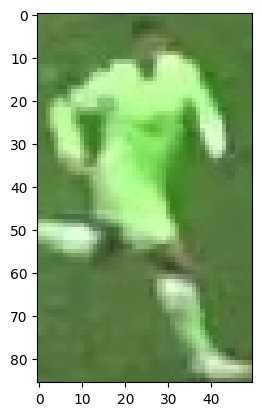

In [10]:
plt.imshow(image)
plt.show

# Take the top half of the image

<function matplotlib.pyplot.show(close=None, block=None)>

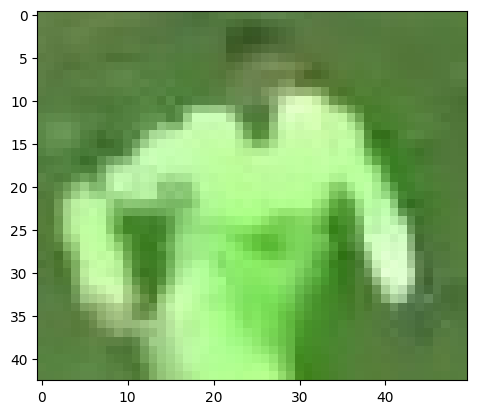

In [19]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show

# Cluster the image into two clusters

<function matplotlib.pyplot.show(close=None, block=None)>

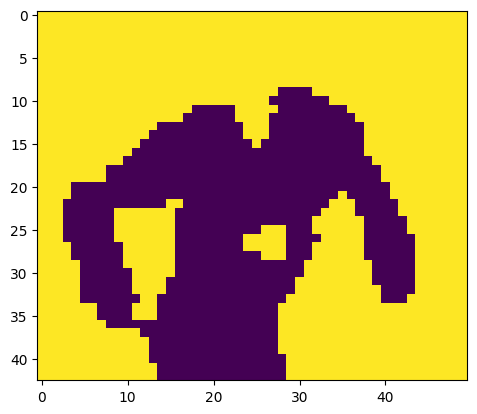

In [20]:
#idea: remove background
# using k-means
image_2d = top_half_image.reshape(-1, 3)

#perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

#get the cluster label
labels = kmeans.labels_

#reshape the labels into the original image shape
clustered_img = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

#display the clusterd image
plt.imshow(clustered_img)
plt.show


# Get the average color


In [21]:
# idea: get the class for the 4 corner
corner_cluster = [clustered_img[0, 0], clustered_img[0, -1], clustered_img[-1, 0], clustered_img[-1,-1]]
non_player_cluster = max(set(corner_cluster), key=corner_cluster.count)
print(non_player_cluster)

1


In [24]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [ ]:
kmeans.cluster_centers_[player_cluster] 
# using RGB color to check average color of the clothes

array([171.15171504, 235.44327177, 142.55804749])